In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth=8000)

In [6]:
f =cv.imread('/content/drive/My Drive/DIP-ESE558/Project 5/dance2gray.jpg')

In [16]:
I1 = cv.imread('/content/drive/My Drive/DIP-ESE558/Project 5/dance2gray.jpg')

M, N, C = I1.shape
I2 = rgb2gray(I1)
I2 = np.double(I2) / 255.0
g = np.zeros((M, N))

In [ ]:
filt_M = 11  # Filter size
filt_N = 11
diameter = 9
radius = np.floor(diameter / 2)  # diameter = 2r+1 (odd diameter)
print(radius)
radius = int(radius)
A = np.floor(filt_M / 2)
B = np.floor(filt_N / 2)
h = np.zeros((filt_M, filt_N))  # filter

for i in range(filt_M):
    for j in range(filt_N):
        r = np.sqrt((i - A) ** 2 + (j - B) ** 2)
        if r < radius:
            h[i, j] = 1

sum_h = np.sum(h)
h = np.double(h) / sum_h  # normalise

# Reflection at borders and convolution
for m in range(M):
    for n in range(N):
        sum_g = 0.0
        for p in range(int(-radius), int(radius + 1)):
            if m - p < 1:
                k = abs(m - p) + 1
            elif m - p > M - 1:
                k = M - ((m - p) - M) - 1
            else:
                k = m - p

            for q in range(int(-radius), int(radius + 1)):
                if n - q < 1:
                    l = abs(n - q) + 1
                elif n - q > N - 1:
                    l = N - ((n - q) - N) - 1
                else:
                    l = n - q

                sum_g += h[p + radius, q + radius] * I2[k, l]
        g[m, n] = sum_g



Original grayscale image


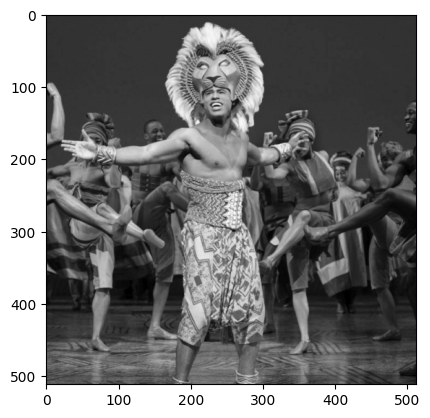

Blurred grayscale image using Cylindrical PSF


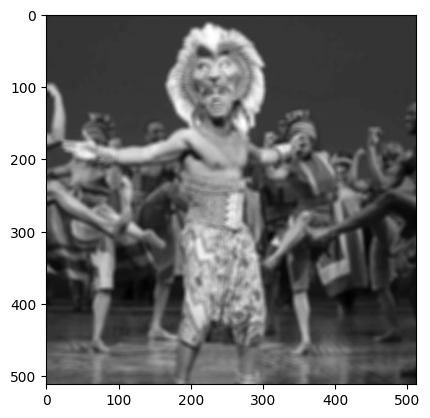

In [13]:
print("Original grayscale image")
I1 = cv.cvtColor(I1, cv.COLOR_BGR2RGB)
pixels = np.array(I1)
plt.imshow(pixels)
plt.show()

print("Blurred grayscale image using Cylindrical PSF")
pixels = np.array(g)
plt.imshow(pixels, cmap='gray')
plt.show()

